# Creating tensors in TensorFlow

In [1]:
import tensorflow as tf
import numpy as np

np.set_printoptions(precision=3)

a = np.array([1, 2, 3], dtype=np.int32)
b = [4, 5, 6]

t_a = tf.convert_to_tensor(a)
t_b = tf.convert_to_tensor(b)

print(t_a)
print(t_b)

tf.Tensor([1 2 3], shape=(3,), dtype=int32)
tf.Tensor([4 5 6], shape=(3,), dtype=int32)


In [2]:
t_ones = tf.ones((2, 3))
t_ones.shape

TensorShape([2, 3])

In [3]:
# To get access to the values that a tensor refers to
# simply call the .numpy() method on a tensor

t_ones.numpy()

array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

In [4]:
const_tensor = tf.constant([1.2, 5, np.pi], dtype=tf.float32)
print(const_tensor)

tf.Tensor([1.2   5.    3.142], shape=(3,), dtype=float32)


In [5]:
t_a_new = tf.cast(t_a, tf.int64)
print(t_a_new.dtype)

<dtype: 'int64'>


### Transposing a tensor:

In [6]:
t = tf.random.uniform(shape=(3, 5))
t_tr = tf.transpose(t)
print(t.shape, ' --> ', t_tr.shape)

(3, 5)  -->  (5, 3)


### Reshaping a tensor (for example, from a 1D vector to a 2D array):

In [7]:
t = tf.zeros((30,))
t_reshape = tf.reshape(t, shape=(5, 6))
print(t_reshape.shape)

(5, 6)


### Removing the unnecessary dimensions (dimensions that have size 1, which are not needed):

In [8]:
t = tf.zeros((1, 2, 1, 4, 1))
t_sqz = tf.squeeze(t, axis=(2, 4))
print(t.shape, ' --> ', t_sqz.shape)

(1, 2, 1, 4, 1)  -->  (1, 2, 4)


# Applying mathematical operations to tensors

In [9]:
# instantiate two random tensors, one with uniform distribution in range (-1, 1), other with standard normal distribution

tf.random.set_seed(1)
t1 = tf.random.uniform(shape=(5, 2), minval=-1.0, maxval=1.0)
t2 = tf.random.normal(shape=(5, 2), mean=0.0, stddev=1.0)

t3 = tf.multiply(t1, t2).numpy()
print(t3)

# compute the mean, sum, and standard deviation along a certain axis
t4 = tf.math.reduce_mean(t1, axis=0)
print(t4)

# matrix-matrix product between t1 and t2
t5 = tf.linalg.matmul(t1, t2,  transpose_b=True)
print(t5.numpy())

t6 = tf.linalg.matmul(t1, t2, transpose_a=True)
print(t6.numpy())

norm_t1 = tf.norm(t1, ord=2, axis=1).numpy()
print(norm_t1)

[[-0.27  -0.874]
 [-0.017 -0.175]
 [-0.296 -0.139]
 [-0.727  0.135]
 [-0.401  0.004]]
tf.Tensor([0.09  0.207], shape=(2,), dtype=float32)
[[-1.144  1.115 -0.87  -0.321  0.856]
 [ 0.248 -0.191  0.25  -0.064 -0.331]
 [-0.478  0.407 -0.436  0.022  0.527]
 [ 0.525 -0.234  0.741 -0.593 -1.194]
 [-0.099  0.26   0.125 -0.462 -0.396]]
[[-1.711  0.302]
 [ 0.371 -1.049]]
[1.046 0.293 0.504 0.96  0.383]


# Split, stack, and concatenate tensors

### Providing the number of splits (must be divisible):

In this example, a tensor of size 6 was divided into a list of three tensors each with size 2

In [10]:
tf.random.set_seed(1)
t = tf.random.uniform((6,))
print(t.numpy())

[0.165 0.901 0.631 0.435 0.292 0.643]


In [11]:
t_splits = tf.split(t, num_or_size_splits=3)
[item.numpy() for item in t_splits]

[array([0.165, 0.901], dtype=float32),
 array([0.631, 0.435], dtype=float32),
 array([0.292, 0.643], dtype=float32)]

### Providing the sizes of different splits

splitting a tensor of size 5 into tensors of sizes 3 and 2

In [12]:
tf.random.set_seed(1)
t = tf.random.uniform((5,))
print(t.numpy())

[0.165 0.901 0.631 0.435 0.292]


In [13]:
t_splits = tf.split(t, num_or_size_splits=[3, 2])
[item.numpy() for item in t_splits]

[array([0.165, 0.901, 0.631], dtype=float32),
 array([0.435, 0.292], dtype=float32)]

### Concatenate or stack tensors into a single tensor

In this case, TensorFlow functions such as tf.stack() and tf.concat() come in handy. For example, let's create a 1D tensor, A, containing 1s with size 3 and a 1D tensor, B, containing 0s with size 2 and concatenate them into a 1D tensor, C, of size 5:

In [14]:
A = tf.ones((3,))
B = tf.zeros((2,))
C = tf.concat([A, B], axis=0)
print(C.numpy())

[1. 1. 1. 0. 0.]


In [15]:
A = tf.ones((3,))
B = tf.zeros((3,))
S = tf.stack([A, B], axis=1)
print(S.numpy())

[[1. 0.]
 [1. 0.]
 [1. 0.]]


# Building input pipelines using tf.data – the TensorFlow Dataset API

### Creating a TensorFlow Dataset from existing tensors

In [16]:
a = [1.2, 3.4, 7.5, 4.1, 5.0, 1.0]
ds = tf.data.Dataset.from_tensor_slices(a)
print(ds)

<TensorSliceDataset shapes: (), types: tf.float32>


In [17]:
for item in ds:
    print(item)

tf.Tensor(1.2, shape=(), dtype=float32)
tf.Tensor(3.4, shape=(), dtype=float32)
tf.Tensor(7.5, shape=(), dtype=float32)
tf.Tensor(4.1, shape=(), dtype=float32)
tf.Tensor(5.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)


In [18]:
ds_batch = ds.batch(3)

for i, elem in enumerate(ds_batch, 1):
    print('batch {}:'.format(i), elem.numpy())

batch 1: [1.2 3.4 7.5]
batch 2: [4.1 5.  1. ]


This will create two batches from this dataset, where the first three elements go into batch #1, and the remaining elements go into batch #2.

### Combining two tensors into a joint dataset

In [19]:
tf.random.set_seed(1)

t_x = tf.random.uniform([4, 3], dtype=tf.float32)
t_y = tf.range(4)

ds_x = tf.data.Dataset.from_tensor_slices(t_x)
ds_y = tf.data.Dataset.from_tensor_slices(t_y)

ds_joint = tf.data.Dataset.zip((ds_x, ds_y))

for example in ds_joint:
    print('x:', example[0].numpy(),
          ' y:', example[1].numpy())

x: [0.165 0.901 0.631]  y: 0
x: [0.435 0.292 0.643]  y: 1
x: [0.976 0.435 0.66 ]  y: 2
x: [0.605 0.637 0.614]  y: 3


In [20]:
ds_joint = tf.data.Dataset.from_tensor_slices((t_x, t_y))
for example in ds_joint:
    print('x:', example[0].numpy(),
          ' y:', example[1].numpy())

x: [0.165 0.901 0.631]  y: 0
x: [0.435 0.292 0.643]  y: 1
x: [0.976 0.435 0.66 ]  y: 2
x: [0.605 0.637 0.614]  y: 3


### Shuffle, batch, and repeat

In [21]:
tf.random.set_seed(1)
ds = ds_joint.shuffle(buffer_size=len(t_x))
for example in ds:
    print(' x:', example[0].numpy(),
          ' y:', example[1].numpy())

 x: [0.976 0.435 0.66 ]  y: 2
 x: [0.435 0.292 0.643]  y: 1
 x: [0.165 0.901 0.631]  y: 0
 x: [0.605 0.637 0.614]  y: 3


rows are shuffled without losing the one-to-one correspondence between the entries in x and y

If the dataset is small, choosing a relatively small buffer_size may negatively affect the predictive performance of the NN as the dataset may not be completely randomized

In [22]:
ds = ds_joint.batch(batch_size=3, drop_remainder=False)
batch_x, batch_y = next(iter(ds))
print('Batch-x:\n', batch_x.numpy())

Batch-x:
 [[0.165 0.901 0.631]
 [0.435 0.292 0.643]
 [0.976 0.435 0.66 ]]


In [23]:
print('Batch-y: ', batch_y.numpy())

Batch-y:  [0 1 2]


In addition, when training a model for multiple epochs, we need to shuffle and iterate over the dataset by the desired number of epochs.

In [24]:
ds = ds_joint.batch(3).repeat(count=2)
for i,(batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (3, 3) [0 1 2]
1 (1, 3) [3]
2 (3, 3) [0 1 2]
3 (1, 3) [3]


This results in two copies of each batch. If we change the order of these two operations, that is, first batch and then repeat, the results will be different:

In [25]:
ds = ds_joint.repeat(count=2).batch(3)
for i, (batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (3, 3) [0 1 2]
1 (3, 3) [3 0 1]
2 (2, 3) [2 3]


Notice the difference between the batches. When we first batch and then repeat,
we get four batches. On the other hand, when repeat is performed first, three batches are created.

In [26]:
## Order 1: shuffle -> batch -> repeat

tf.random.set_seed(1)
ds = ds_joint.shuffle(4).batch(2).repeat(3)

for i, (batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (2, 3) [2 1]
1 (2, 3) [0 3]
2 (2, 3) [0 3]
3 (2, 3) [1 2]
4 (2, 3) [3 0]
5 (2, 3) [1 2]


In [27]:
## Order 2: batch -> shuffle -> repeat

tf.random.set_seed(1)
ds = ds_joint.batch(2).shuffle(4).repeat(3)
for i,(batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (2, 3) [0 1]
1 (2, 3) [2 3]
2 (2, 3) [0 1]
3 (2, 3) [2 3]
4 (2, 3) [2 3]
5 (2, 3) [0 1]


# Creating a dataset from files on your local storage disk

In [4]:
import pathlib # for importing pictures
import tensorflow as tf
import numpy as np
import os

imgdir_path = pathlib.Path('cat_dog_images')

file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])

print(file_list)

['cat_dog_images/cat-01.jpg', 'cat_dog_images/cat-02.jpg', 'cat_dog_images/cat-03.jpg', 'cat_dog_images/dog-01.jpg', 'cat_dog_images/dog-02.jpg', 'cat_dog_images/dog-03.jpg']


Image shape:  (900, 1200, 3)
Image shape:  (900, 1200, 3)
Image shape:  (900, 742, 3)
Image shape:  (800, 1200, 3)
Image shape:  (800, 1200, 3)
Image shape:  (900, 1200, 3)


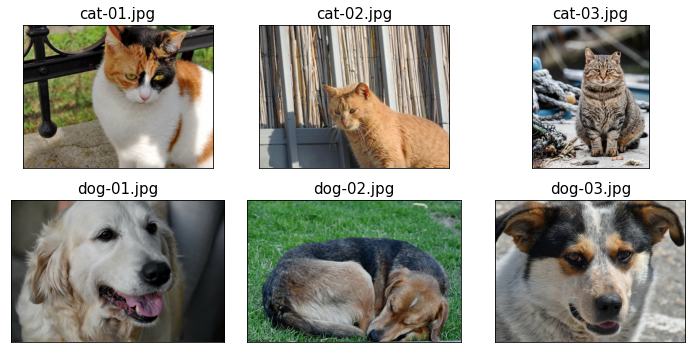

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 5))
for i,file in enumerate(file_list):
    img_raw = tf.io.read_file(file)
    img = tf.image.decode_image(img_raw)
    print('Image shape: ', img.shape)
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)
    
plt.savefig('cat_dog.png')
plt.tight_layout()
plt.show()

In [7]:
labels = [1 if 'dog' in os.path.basename(file) else 0 for file in file_list]
print(labels)

[0, 0, 0, 1, 1, 1]


In [8]:
# create dataset from 2 tensors (data + labels)

ds_files_labels = tf.data.Dataset.from_tensor_slices((file_list, labels))

for item in ds_files_labels:
    print(item[0].numpy(), item[1].numpy())

b'cat_dog_images/cat-01.jpg' 0
b'cat_dog_images/cat-02.jpg' 0
b'cat_dog_images/cat-03.jpg' 0
b'cat_dog_images/dog-01.jpg' 1
b'cat_dog_images/dog-02.jpg' 1
b'cat_dog_images/dog-03.jpg' 1


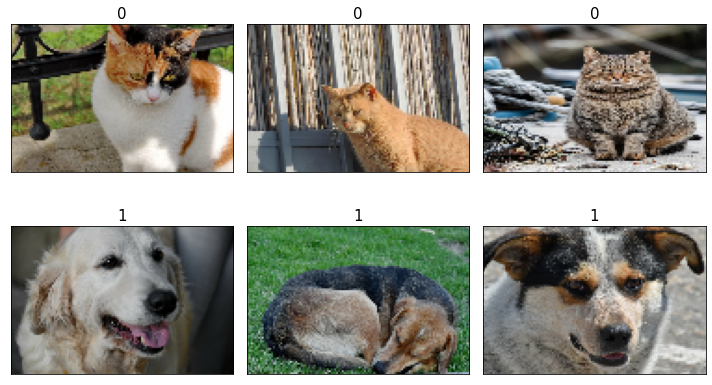

In [9]:
# apply transformation - load image content from file path, decode raw concent, resize

def load_and_preprocess(path, label):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [img_height, img_width])
    image = image / 255.0
    return image, label

img_width, img_height = 120, 80

ds_images_labels = ds_files_labels.map(load_and_preprocess)

fig = plt.figure(figsize=(10, 6))

for i, example in enumerate(ds_images_labels):
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(example[0])
    ax.set_title('{}'.format(example[1].numpy()), size=15)

plt.tight_layout()
plt.show()

# Fetching available datasets from the tensorflow_datasets library

In [11]:
import tensorflow_datasets as tfds

print(len(tfds.list_builders()))
print(tfds.list_builders()[:5])

101
['abstract_reasoning', 'aflw2k3d', 'amazon_us_reviews', 'bair_robot_pushing_small', 'bigearthnet']


In [12]:
# CelebA dataset

celeba_bldr = tfds.builder('celeb_a')
print(celeba_bldr.info.features)

print(celeba_bldr.info.features['image'])

print(celeba_bldr.info.features['attributes'].keys())

print(celeba_bldr.info.citation)

FeaturesDict({
    'attributes': FeaturesDict({
        '5_o_Clock_Shadow': Tensor(shape=(), dtype=tf.bool),
        'Arched_Eyebrows': Tensor(shape=(), dtype=tf.bool),
        'Attractive': Tensor(shape=(), dtype=tf.bool),
        'Bags_Under_Eyes': Tensor(shape=(), dtype=tf.bool),
        'Bald': Tensor(shape=(), dtype=tf.bool),
        'Bangs': Tensor(shape=(), dtype=tf.bool),
        'Big_Lips': Tensor(shape=(), dtype=tf.bool),
        'Big_Nose': Tensor(shape=(), dtype=tf.bool),
        'Black_Hair': Tensor(shape=(), dtype=tf.bool),
        'Blond_Hair': Tensor(shape=(), dtype=tf.bool),
        'Blurry': Tensor(shape=(), dtype=tf.bool),
        'Brown_Hair': Tensor(shape=(), dtype=tf.bool),
        'Bushy_Eyebrows': Tensor(shape=(), dtype=tf.bool),
        'Chubby': Tensor(shape=(), dtype=tf.bool),
        'Double_Chin': Tensor(shape=(), dtype=tf.bool),
        'Eyeglasses': Tensor(shape=(), dtype=tf.bool),
        'Goatee': Tensor(shape=(), dtype=tf.bool),
        'Gray_Hair': Te

The 'image' entry refers to the face image of a celebrity; 

'landmarks' refers to the dictionary of extracted facial points, such as the position of the eyes, nose, and so on

'attributes' is a dictionary of 40 facial attributes for the person in the image, like facial expression, makeup, hair properties, and so on.

In [13]:
celeba_bldr.download_and_prepare()

datasets = celeba_bldr.as_dataset(shuffle_files=False)
datasets.keys()

/Users/timco/.conda/envs/ml/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/Users/timco/.conda/envs/ml/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/Users/timco/.conda/envs/ml/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/Users/timco/.conda/envs/ml/lib/python3.7/site-packages/urllib3/connectio

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset celeb_a downloaded and prepared to /Users/timco/tensorflow_datasets/celeb_a/0.3.0. Subsequent calls will reuse this data.


dict_keys(['test', 'train', 'validation'])

This dataset is already split into train, test, and validation datasets. In order to see what the image examples look like, we can execute the following code:

In [14]:
ds_train = datasets['train']

assert isinstance(ds_train, tf.data.Dataset)
example = next(iter(ds_train))

print(type(example))
print(example.keys())

<class 'dict'>
dict_keys(['attributes', 'image', 'landmarks'])


In [15]:
ds_train = ds_train.map(lambda item: (item['image'], tf.cast(item['attributes']['Male'], tf.int32)))

ds_train = ds_train.batch(18)
images, labels = next(iter(ds_train))
print(images.shape, labels)

(18, 218, 178, 3) tf.Tensor([1 1 0 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0], shape=(18,), dtype=int32)


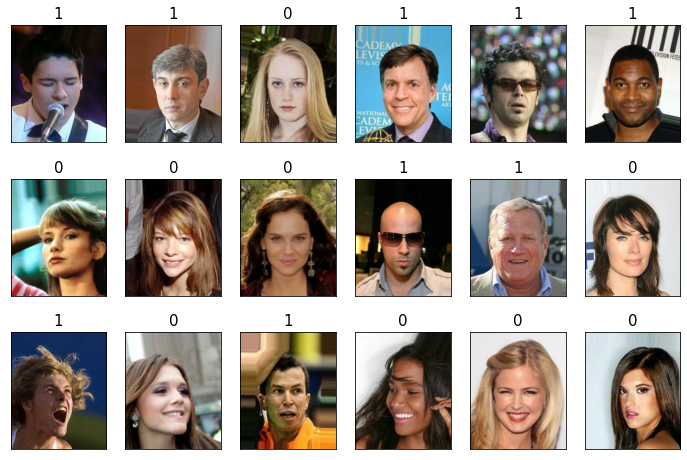

In [16]:
fig = plt.figure(figsize=(12, 8))
for i, (image, label) in enumerate(zip(images, labels)):
    ax = fig.add_subplot(3, 6, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image)
    ax.set_title('{}'.format(label), size=15)
    
plt.show()

In [17]:
mnist, mnist_info = tfds.load('mnist', with_info=True, shuffle_files=False)
print(mnist_info)

/Users/timco/.conda/envs/ml/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/Users/timco/.conda/envs/ml/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/Users/timco/.conda/envs/ml/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/Users/timco/.conda/envs/ml/lib/python3.7/site-packages/urllib3/connectio

Dataset mnist downloaded and prepared to /Users/timco/tensorflow_datasets/mnist/1.0.0. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='mnist',
    version=1.0.0,
    description='The MNIST database of handwritten digits.',
    urls=['https://storage.googleapis.com/cvdf-datasets/mnist/'],
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann. lecun. com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)



In [18]:
print(mnist.keys())

dict_keys(['test', 'train'])


As we can see, the MNIST dataset is split into two partitions. Now, we can take the train partition, apply a transformation to convert the elements from a dictionary to a tuple, and visualize 10 examples:

(10, 28, 28, 1) tf.Tensor([3 4 7 1 9 0 8 8 9 7], shape=(10,), dtype=int64)


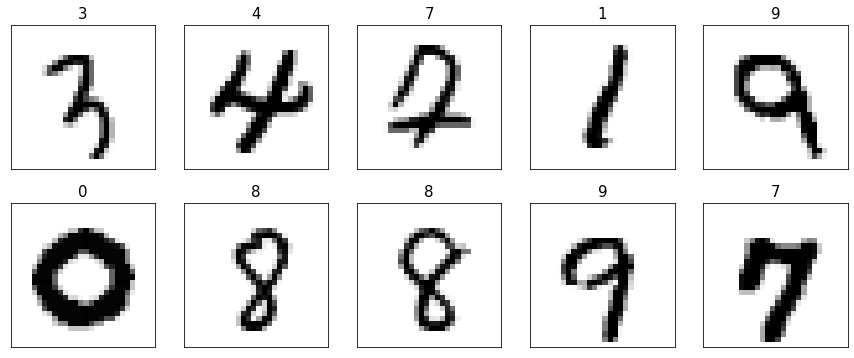

In [19]:
ds_train = mnist['train']
ds_train = ds_train.map(lambda item: (item['image'], item['label']))
ds_train = ds_train.batch(10)
batch = next(iter(ds_train))
print(batch[0].shape, batch[1])

fig = plt.figure(figsize=(15, 6))
for i, (image, label) in enumerate(zip(batch[0], batch[1])):
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image[:, :, 0], cmap='gray_r')
    ax.set_title('{}'.format(label), size=15)
    
plt.show()